## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combine = pd.merge(mouse_metadata ,study_results, on = 'Mouse ID', how = 'left')

# Display the data table for preview
mouse_combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice.
total_mice = len(mouse_combine)
total_mice


1893

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dups = mouse_combine[mouse_combine.duplicated(['Mouse ID', 'Timepoint'])]

dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
dups_all = mouse_combine[mouse_combine.duplicated()]
dups_all



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_combine.drop_duplicates('Mouse ID')
clean_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [59]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_mouse)
total_mice

249

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_mouse = mouse_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_mouse = mouse_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_mouse = mouse_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_mouse = mouse_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_mouse = mouse_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_summary = pd.DataFrame ({ "Mean":mean_mouse,
                               "Median":med_mouse,
                               "Variance":var_mouse,
                               "Standard Deviation":std_mouse,
                               "SEM":sem_mouse
    
})
mouse_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [62]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_mouse = pd.DataFrame(mouse_combine.groupby(["Drug Regimen"]).count()).reset_index()
drug_mousedf = drug_mouse[["Drug Regimen", "Mouse ID"]]
drug_mousedf =drug_mousedf.set_index("Drug Regimen")

<AxesSubplot:xlabel='Drug Regimen'>

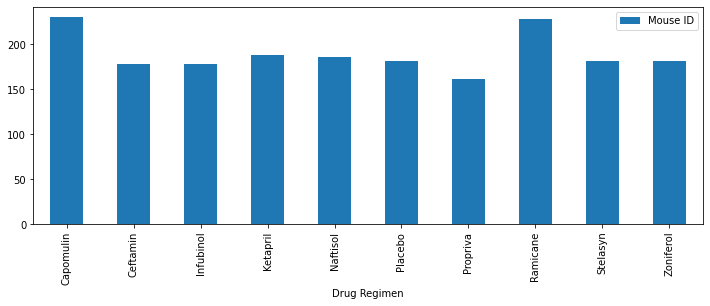

In [78]:
drug_mousedf.plot(kind = "bar", figsize=(12,4))

<BarContainer object of 10 artists>

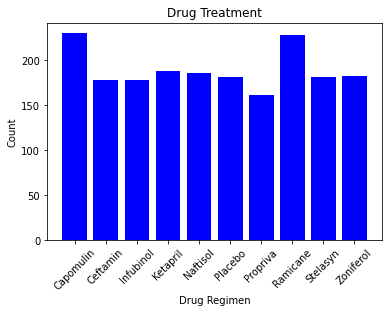

In [124]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
mice = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(mice))

#plt.bar(x_axis, mice, color = "b", align= "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation= 45)

#plt.ylim(0, max(mice)+0.4)
#plt.xlim(-0.75, len(x_axis)-0.50)


plt.title("Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.bar(x_axis, mice, color = "b", align= "center")


In [125]:
#drug_count = (mouse_combine.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
#drug_count

In [126]:
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, drugs)
#tick_locations

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mouse = pd.DataFrame(mouse_combine.groupby(["Sex"]).count()).reset_index()
gender_mouse

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


([<matplotlib.patches.Wedge at 0x7f88066237c0>,
 [Text(-0.022900912879184103, 1.1997814585120492, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.013358865846190724, 0.699872517465362, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

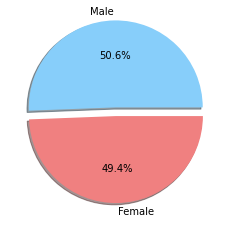

In [148]:
labels =["Male","Female"]
sizes = [958, 935]
colors = ["lightskyblue","lightcoral"]
explode = (0.1,0)
plt.pie(sizes, labels=labels,colors=colors, autopct="%1.1f%%",explode = explode,shadow =True)


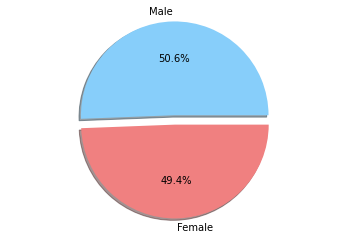

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice = ["Male", "Female"]
mice_count = [958, 935]
colors = ["lightskyblue","lightcoral"]
explode = (0.1,0)

plt.pie(mice_count, explode= explode, labels = mice, colors=colors, autopct="%1.1f%%", shadow=True, startangle=360)

plt.axis("equal")

plt.savefig("matplotlib-challenge.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [166]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = mouse_combine.sort_values(["Drug Regimen","Mouse ID", "Timepoint"], ascending = False)
last_tp = last_time.loc[last_time["Timepoint"] ==45]
last_tp.head().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#time_merge = pd.merge(mouse_combine, last_tp)
#time_merge

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1719,w575,Zoniferol,Female,16,28,45,68.401286,3
1,1518,s337,Zoniferol,Male,14,27,45,62.109651,4
2,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
3,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
4,1344,p136,Zoniferol,Female,5,28,45,63.488697,2


In [168]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treats = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = last_tp.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

KeyError: 0.25

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
